In [1]:
# Todo
# find elbow score
# backtrace and show genes in best combo in a heatmap

In [2]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
PATH80 = "./../logs/hedgehog_80_exp/"
PATH15 = "./../logs/ARCHIVE/hedgehog_top15_method/"

In [129]:
allSets =[]
maxValues = pd.DataFrame(index=range(1,36), columns = ["Genes", "Accuracy"])
minValues = pd.DataFrame(index=range(1,36), columns = ["Genes", "Accuracy"])
stdValues =  pd.DataFrame(index=range(1,36), columns = ["Accuracy"])
for i in range(1,36):
    s= pd.DataFrame( columns = ["Genes", "Accuracy"])
    count = 0
    with open(PATH80 + 'hh_'+str(i)+'_gene_accuracy.txt' , "r") as f:
        for line in f:
            (key, val) = line.split("\t")
            val =val.replace("\n", "")
            key = key.replace(",)",")")
            s.loc[count,"Genes"] = key
            s.loc[count,"Accuracy"] = val
            count += 1
        allSets.append(s)
        #Add MAX
        maxValues.loc[i,"Genes"]= s.max()["Genes"]
        maxValues.loc[i,"Accuracy"] = float(s.max()["Accuracy"])
        #Add Min
        minValues.loc[i,"Genes"]= s.min()["Genes"]
        minValues.loc[i,"Accuracy"] = float(s.min()["Accuracy"])
        #Add Std
        vals = [float(x) for x in s["Accuracy"]]
        stdValues.loc[i,"Accuracy"] =np.std(vals)

In [130]:
allSets15 =[]
maxValues15 = pd.DataFrame(index=range(1,36), columns = ["Genes", "Accuracy"])
minValues15 = pd.DataFrame(index=range(1,36), columns = ["Genes", "Accuracy"])
stdValues15 =  pd.DataFrame(index=range(1,36), columns = ["Accuracy"])
for i in range(1,36):
    s= pd.DataFrame( columns = ["Genes", "Accuracy"])
    count = 0
    with open(PATH15 + 'hh_'+str(i)+'_gene_accuracy.txt' , "r") as f:
        for line in f:
            (key, val) = line.split("\t")
            val =val.replace("\n", "")
            key = key.replace(",)",")")
            s.loc[count,"Genes"] = key
            s.loc[count,"Accuracy"] = val
            count += 1
        allSets15.append(s)
        #Add MAX
        maxValues15.loc[i,"Genes"]= s.max()["Genes"]
        maxValues15.loc[i,"Accuracy"] = float(s.max()["Accuracy"])
        #Add Min
        minValues15.loc[i,"Genes"]= s.min()["Genes"]
        minValues15.loc[i,"Accuracy"] = float(s.min()["Accuracy"])
        #Add Std
        vals = [float(x) for x in s["Accuracy"]]
        stdValues15.loc[i,"Accuracy"] =np.std(vals)

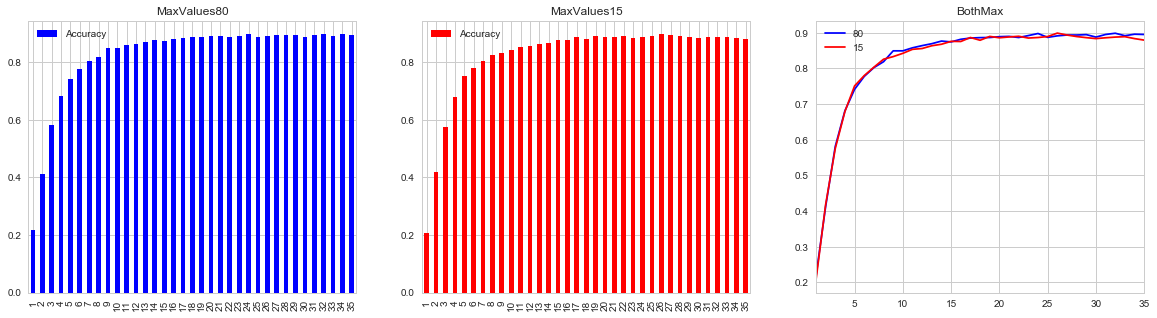

In [308]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,5))

maxValues.plot(x= maxValues.index.values , y="Accuracy",color="blue",ax=axes[0],title="MaxValues80",kind="bar")
maxValues15.plot(x= maxValues15.index.values , y="Accuracy",color="red", ax=axes[1],title="MaxValues15",kind="bar")

ax = maxValues.plot(x= maxValues.index.values , y="Accuracy",color="blue",ax=axes[2],title="BothMax",label="80")
maxValues15.plot(x= maxValues15.index.values , y="Accuracy",color="red", ax=ax,label="15")

plt.show()


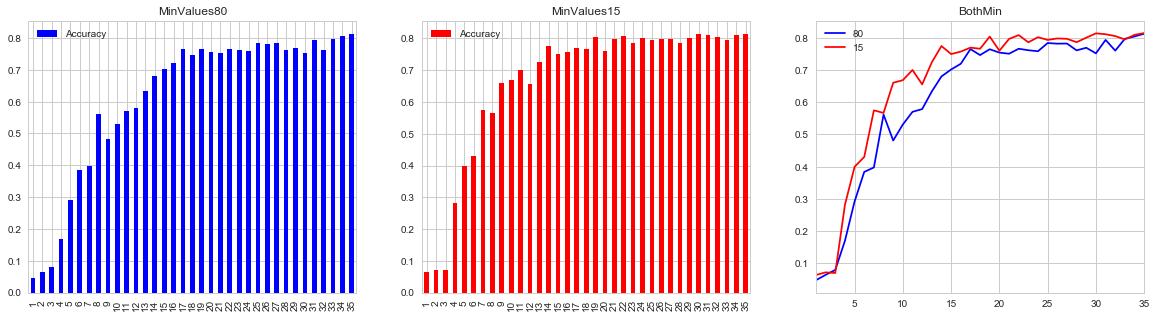

In [309]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,5))

minValues.plot(x= minValues.index.values , y="Accuracy",color="blue",ax=axes[0],title="MinValues80",kind="bar")
minValues15.plot(x= minValues15.index.values , y="Accuracy",color="red", ax=axes[1],title="MinValues15",kind="bar")

ax = minValues.plot(x= minValues.index.values , y="Accuracy",color="blue",ax=axes[2],title="BothMin",label="80")
minValues15.plot(x= minValues15.index.values , y="Accuracy",color="red", ax=ax,label="15")

plt.show()

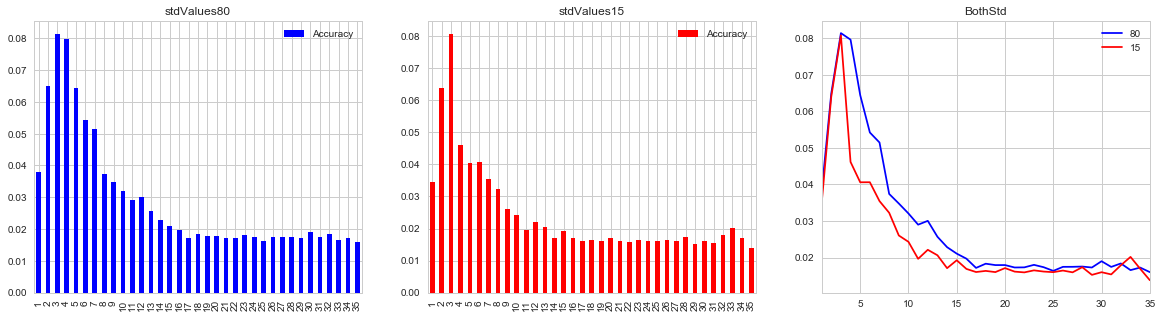

In [310]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,5))

stdValues.plot(x= stdValues.index.values , y="Accuracy",color="blue",ax=axes[0],title="stdValues80",kind="bar")
stdValues15.plot(x= stdValues15.index.values , y="Accuracy",color="red", ax=axes[1],title="stdValues15",kind="bar")

ax = stdValues.plot(x= stdValues.index.values , y="Accuracy",color="blue",ax=axes[2],title="BothStd",label="80")
stdValues15.plot(x= stdValues15.index.values , y="Accuracy",color="red", ax=ax,label="15")

plt.show()

In [312]:
#Todo Make a HeatMap across Samples
#Genes appearance in Combos

In [337]:
genes80 = pd.DataFrame(index=range(1,36))
genes15 = pd.DataFrame(index=range(1,36))

In [343]:
for gene in allSets[0]['Genes']:
    gene = gene.replace("('","")
    gene = gene.replace("')","")
    genes80.loc[1,gene] = 1
    genes15.loc[1,gene] = 1
    
genes15.loc[1] = genes15.loc[1].div(36)
genes80.loc[1] = genes80.loc[1].div(36)

In [344]:
for i in range(1,len(allSets)):
    count = 0
    for combo in allSets[i]["Genes"]:
        array = eval(combo)
        for gene in genes80.columns.values:
            if gene in array:
                if np.isnan(genes80.loc[i+1,gene]):
                    genes80.loc[i+1,gene] = 1
                else:
                    genes80.loc[i+1,gene] +=1
                    
    #normalize
    count = genes80.loc[i+1].sum()
    genes80.loc[i+1] = genes80.loc[i+1].div(count)

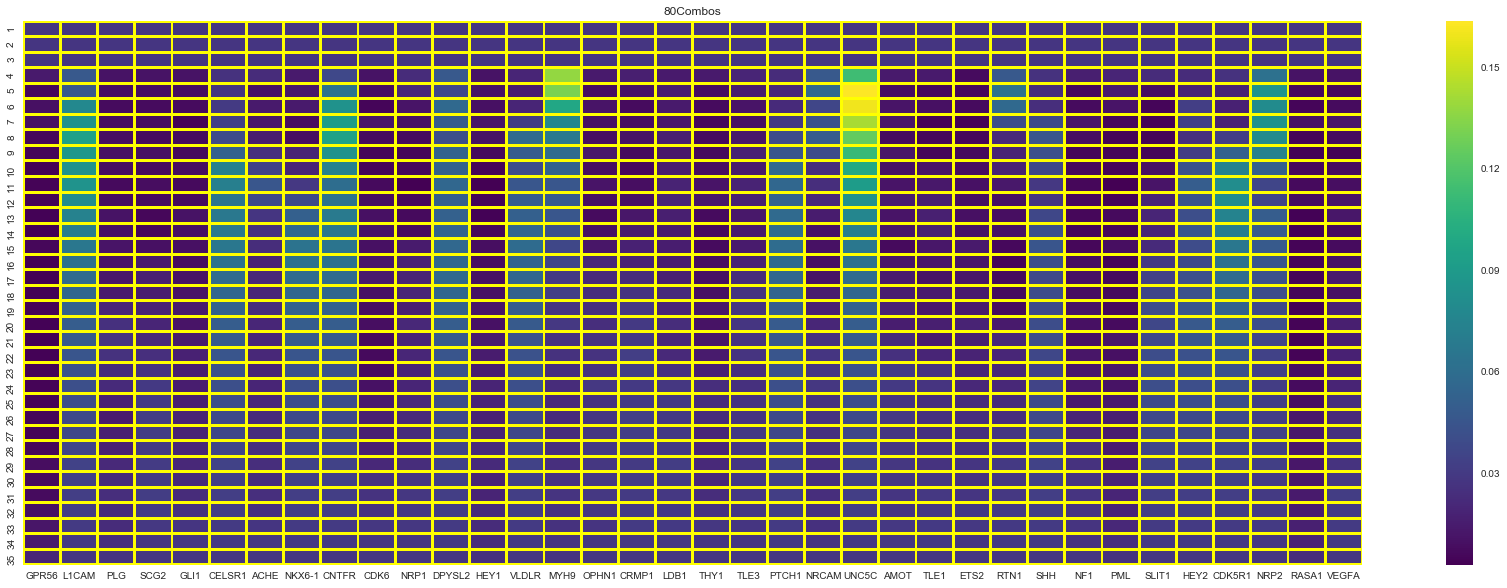

In [345]:
f, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(data=genes80,cmap='viridis',linewidths=2, linecolor='yellow')
plt.title("80Combos")
plt.show()

In [346]:
genes80

,GPR56,L1CAM,PLG,SCG2,GLI1,CELSR1,ACHE,NKX6-1,CNTFR,CDK6,...,RTN1,SHH,NF1,PML,SLIT1,HEY2,CDK5R1,NRP2,RASA1,VEGFA
1,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,...,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778
2,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,...,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778
3,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,...,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778
4,0.013636,0.046970,0.010606,0.010606,0.010606,0.025758,0.022727,0.013636,0.037879,0.010606,...,0.046970,0.025758,0.016667,0.019697,0.022727,0.022727,0.025758,0.062121,0.010606,0.010606
5,0.006250,0.047422,0.008672,0.008672,0.008672,0.028047,0.011094,0.013516,0.064375,0.008672,...,0.064375,0.023203,0.006250,0.015937,0.008672,0.018359,0.018359,0.086172,0.006250,0.006250
6,0.009512,0.077750,0.007444,0.007444,0.007444,0.030190,0.013648,0.013648,0.083954,0.005376,...,0.057072,0.023987,0.007444,0.011580,0.005376,0.032258,0.017783,0.079818,0.005376,0.007444
7,0.010073,0.084432,0.008303,0.008303,0.004762,0.033089,0.013614,0.008303,0.091514,0.011844,...,0.040171,0.038400,0.011844,0.006532,0.004762,0.033089,0.018926,0.084432,0.010073,0.011844
8,0.005858,0.094054,0.008952,0.007405,0.007405,0.039898,0.015141,0.008952,0.095601,0.007405,...,0.021331,0.046088,0.008952,0.004310,0.004310,0.024425,0.032162,0.080128,0.004310,0.007405
9,0.005342,0.087759,0.009463,0.009463,0.006716,0.052045,0.024573,0.019078,0.085012,0.005342,...,0.019078,0.042430,0.005342,0.005342,0.005342,0.031441,0.052045,0.074023,0.003968,0.003968
10,0.003704,0.083951,0.008642,0.007407,0.008642,0.072840,0.034568,0.019753,0.074074,0.004938,...,0.018519,0.037037,0.006173,0.004938,0.009877,0.043210,0.074074,0.051852,0.006173,0.007407


In [347]:
for i in range(1,len(allSets15)):
    count = 0
    for combo in allSets15[i]["Genes"]:
        array = eval(combo)
        for gene in genes15.columns.values:
            if gene in array:
                if np.isnan(genes15.loc[i+1,gene]):
                    genes15.loc[i+1,gene] = 1
                else:
                    genes15.loc[i+1,gene] +=1
                    
    #normalize
    count = genes15.loc[i+1].sum()
    genes15.loc[i+1] = genes15.loc[i+1].div(count)

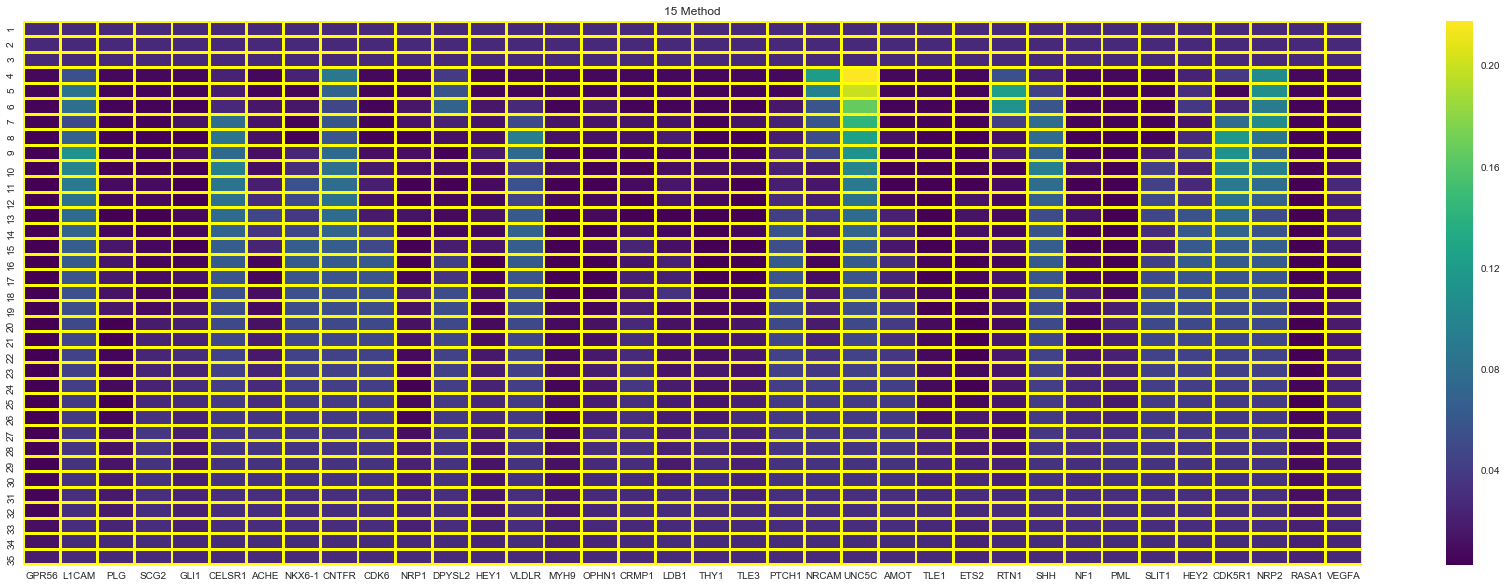

In [348]:
f, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(data=genes15,cmap='viridis',linewidths=2, linecolor='yellow')
plt.title("15 Method")
plt.show()

In [349]:
genes15

,GPR56,L1CAM,PLG,SCG2,GLI1,CELSR1,ACHE,NKX6-1,CNTFR,CDK6,...,RTN1,SHH,NF1,PML,SLIT1,HEY2,CDK5R1,NRP2,RASA1,VEGFA
1,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,...,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778
2,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,...,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778
3,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,...,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778,0.027778
4,0.007576,0.056061,0.007576,0.007576,0.007576,0.023737,0.007576,0.023737,0.088384,0.007576,...,0.056061,0.023737,0.007576,0.007576,0.007576,0.023737,0.039899,0.104545,0.007576,0.007576
5,0.006250,0.083750,0.006250,0.006250,0.006250,0.019167,0.006250,0.006250,0.070833,0.006250,...,0.122500,0.045000,0.006250,0.006250,0.006250,0.032083,0.006250,0.109583,0.006250,0.006250
6,0.005376,0.080645,0.005376,0.005376,0.005376,0.026882,0.016129,0.016129,0.048387,0.005376,...,0.112903,0.059140,0.005376,0.005376,0.005376,0.037634,0.026882,0.091398,0.005376,0.005376
7,0.004762,0.050794,0.004762,0.004762,0.013968,0.078413,0.013968,0.004762,0.060000,0.004762,...,0.041587,0.078413,0.004762,0.004762,0.004762,0.013968,0.078413,0.106032,0.004762,0.004762
8,0.004310,0.068678,0.004310,0.004310,0.004310,0.084770,0.012356,0.004310,0.060632,0.004310,...,0.012356,0.076724,0.004310,0.004310,0.004310,0.028448,0.116954,0.084770,0.004310,0.004310
9,0.003968,0.111111,0.003968,0.003968,0.011111,0.075397,0.011111,0.025397,0.075397,0.011111,...,0.018254,0.068254,0.003968,0.003968,0.018254,0.039683,0.111111,0.068254,0.003968,0.003968
10,0.003704,0.100000,0.003704,0.003704,0.003704,0.093580,0.010123,0.029383,0.080741,0.016543,...,0.003704,0.093580,0.010123,0.003704,0.042222,0.022963,0.100000,0.093580,0.003704,0.010123
